In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('data/data.csv')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Machine Learning
We used a list of machine learning models to predict the decision by both the participant and his or her partner. The first section includes separating data into the training data and testing data. The following machine learning techniques are used:

- **linear_model**
- **Decision Tree**
- **SVC**
- **Random Forest**
- **AdaBoost**
- **K-N Neighbor**
- **Neural Network Model**



In [13]:
race_features = ['race', 'race_o', 'dec', 'dec_o']
race_data = data[race_features]
race_data['race']

,race,samerace,race_o,dec,dec_o
0,4.0,0,2.0,1,0
1,4.0,0,2.0,1,0
2,4.0,1,4.0,1,1
3,4.0,0,2.0,1,1
4,4.0,0,3.0,1,1


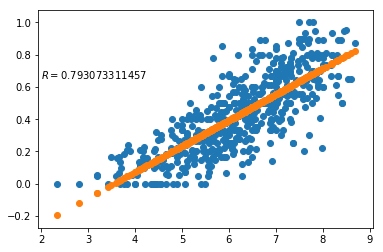

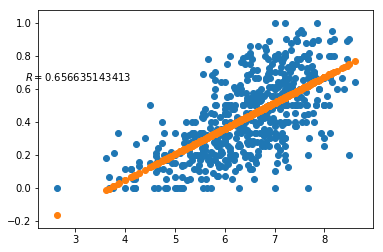

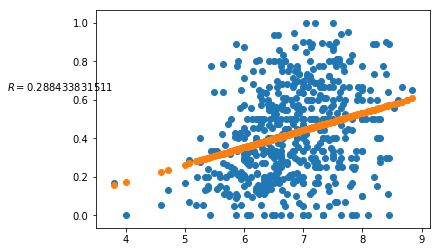

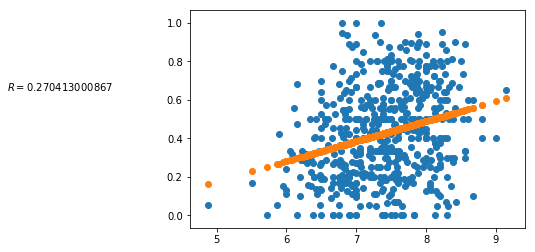

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
def linreg(col):
    mean_attr = data.groupby('pid')[col].mean()
    dec_attr = data.groupby('pid')['dec'].mean()
    lm = linear_model.LinearRegression()
    lm = lm.fit(mean_attr.reshape(-1,1), dec_attr.reshape(-1, 1))
    pred = lm.predict(mean_attr.reshape(-1, 1))
    plt.scatter(mean_attr, dec_attr)
    plt.scatter(mean_attr, pred)
    plt.text(2, 0.65, '$R = $' + str(math.sqrt(lm.score(mean_attr.reshape(-1, 1), dec_attr.reshape(-1, 1)))))
    plt.show()

linreg('attr')
linreg('fun')
linreg('amb')
linreg('intel')

In [4]:
feature_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']
data['ovr'] = [0]*len(data)
for col in feature_list:
    data['ovr'] += data['ovr'] + (data[col] * data[col + "1_1"]) 
for col in data.columns:
    if '1_1' in col:
        feature_list.append(col)
    
feature_list.extend(['dec', 'age', 'age_o', 'samerace'])

In [5]:
def removeComa(lst):
    l = []
    for i in lst:
        fl = ""
        for c in i:
            if ((c == '.') | c.isdigit()):
                fl += c
        l.append(float(fl))
    return l

features = data[feature_list][data['gender'] == 1].dropna()
features = features.dropna()
target = features['dec']
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = \
train_test_split(features.drop('dec', axis = 1), target, test_size = 0.1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_split = 100)
clf_fit = clf.fit(features_train, target_train)
pred = clf_fit.predict(features_test)
from sklearn.metrics import accuracy_score
accuracy_score(pred, target_test)

0.7593123209169055

In [71]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C=1)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)

0.7822349570200573

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10000)
clf = clf.fit(features_train, target_train)
pred= clf.predict(features_test)
accuracy_score(pred, target_test)

0.836676217765043

In [97]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators = 1000)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

0.7820895522388059

In [331]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf = clf.fit(features_train, target_train)
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

0.6185714285714285

In [103]:
clf.predict([[8, 3,5,8,1,4, 20, 0, 5, 5, 70, 0, 20, 20, 1]])

array([1])

In [104]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(1000, 1000))
clf = clf.fit(features_train, target_train)
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
accuracy_score(pred, target_test)

0.7822349570200573